Name : Krishna Rukmini, Puthucode

Panther ID : 002579345

Question 1) (20 points) Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’,
‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five
most similar words. For this task you have to use the most suitable method of the ones we have
seen in class to determine the most similar words to the original input list. You can use a
pre-trained resource if you think is appropriate. After calling your function, print the most similar
words to the screen. Are these ‘similar’ words actually similar? If not, why not? What do you
think can be improved and how - talk about it, do not necessarily implement it?


In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [ ]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
def fetch_similar_words(requiredlst):
  final_list = []
  for ele in requiredlst:
    data=[]
    new =[]
    data.append(ele)
    similar_lst = model.most_similar(ele,topn =5)
    for similar in similar_lst:
      new.append(similar[0])
    data.append(new)
    final_list.append(data)
  return final_list

In [ ]:
requiredlst = ['apple', 'house', 'pear','dog', 'doctor']

fetch_similar_words(requiredlst)

[['apple', ['apples', 'pear', 'fruit', 'berry', 'pears']],
 ['house', ['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse']],
 ['pear', ['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple']],
 ['dog', ['dogs', 'puppy', 'pit_bull', 'pooch', 'cat']],
 ['doctor', ['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']]]

'Similar' words are not actually similar; they can be related in any way; they are simply a grouping to determine the closeness of two chunks of text based on their meaning or surface.
we can featurize both sentences and then compare the cosine similarity of their feature representations. There are numerous methods for featurizing text, ranging from simple counting-based operators like TFIDF to word embeddings like word2vec to more complex language models like BERT.

Question 2) (30 points) Using the Homework 2 dataset, also attached in the Exam 2 files,
shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity
using:


a) Cosine similarity. And create a 42 x 42 heatmap of these similarities

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import pandas as pd

from zipfile import ZipFile
file_name = "/content/shakespeares-works_TXT_FolgerShakespeare.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall("/content/shakespeares-works_TXT_FolgerShakespeare")
  print('Done')

data_dir = "shakespeares-works_TXT_FolgerShakespeare"
files = os.listdir(data_dir+"/")
files.remove("__MACOSX")

data = []
for file in files:
    with open("/content/shakespeares-works_TXT_FolgerShakespeare/"+file, 'r') as fp:
        data.append(fp.read())

Done


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_train = tfidf_vectorizer.fit_transform(data)  #finds the tfidf score with normalization


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [ ]:
cosine_sim

array([[1.        , 0.58426276, 0.77311213, ..., 0.79987355, 0.57175263,
        0.69031404],
       [0.58426276, 1.        , 0.58813332, ..., 0.57541993, 0.44811068,
        0.49727714],
       [0.77311213, 0.58813332, 1.        , ..., 0.80173944, 0.72075305,
        0.68263022],
       ...,
       [0.79987355, 0.57541993, 0.80173944, ..., 1.        , 0.58915758,
        0.67898483],
       [0.57175263, 0.44811068, 0.72075305, ..., 0.58915758, 1.        ,
        0.5231612 ],
       [0.69031404, 0.49727714, 0.68263022, ..., 0.67898483, 0.5231612 ,
        1.        ]])

In [ ]:
df = pd.DataFrame(data = cosine_sim, columns = [file.strip(".txt") for file in files])
df.insert(loc=0, column='Row_Name', value=[file.strip(".txt") for file in files])


In [ ]:
df.head(3)

Row_Name  ...  loves-labors-lost_TXT_FolgerShakespeare
0          lucrece_TXT_FolgerShakespeare  ...                                 0.690314
1   imon-of-athens_TXT_FolgerShakespeare  ...                                 0.497277
2  henry-iv-part-2_TXT_FolgerShakespeare  ...                                 0.682630

[3 rows x 43 columns]

In [ ]:
def plot_heatmap(df_hm, xlabels, ylabels):
    """
    Given a dataframe containing similarity grid, plot the heatmap
    """
    sns.set(style="white")

    # Set up the matplotlib figure
    # (to enlarge the cells, increase the figure size)
    f, ax = plt.subplots(figsize=(48, 48))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(225, 30, as_cmap=True)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_hm, mask=mask, cmap=cmap, center=0.5,
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.5, fmt='.2f',
            annot=True, cbar_kws={"shrink": .10}, vmax=1)

    ax.set_title("Heatmap of cosine similarity scores").set_fontsize(20)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return ax




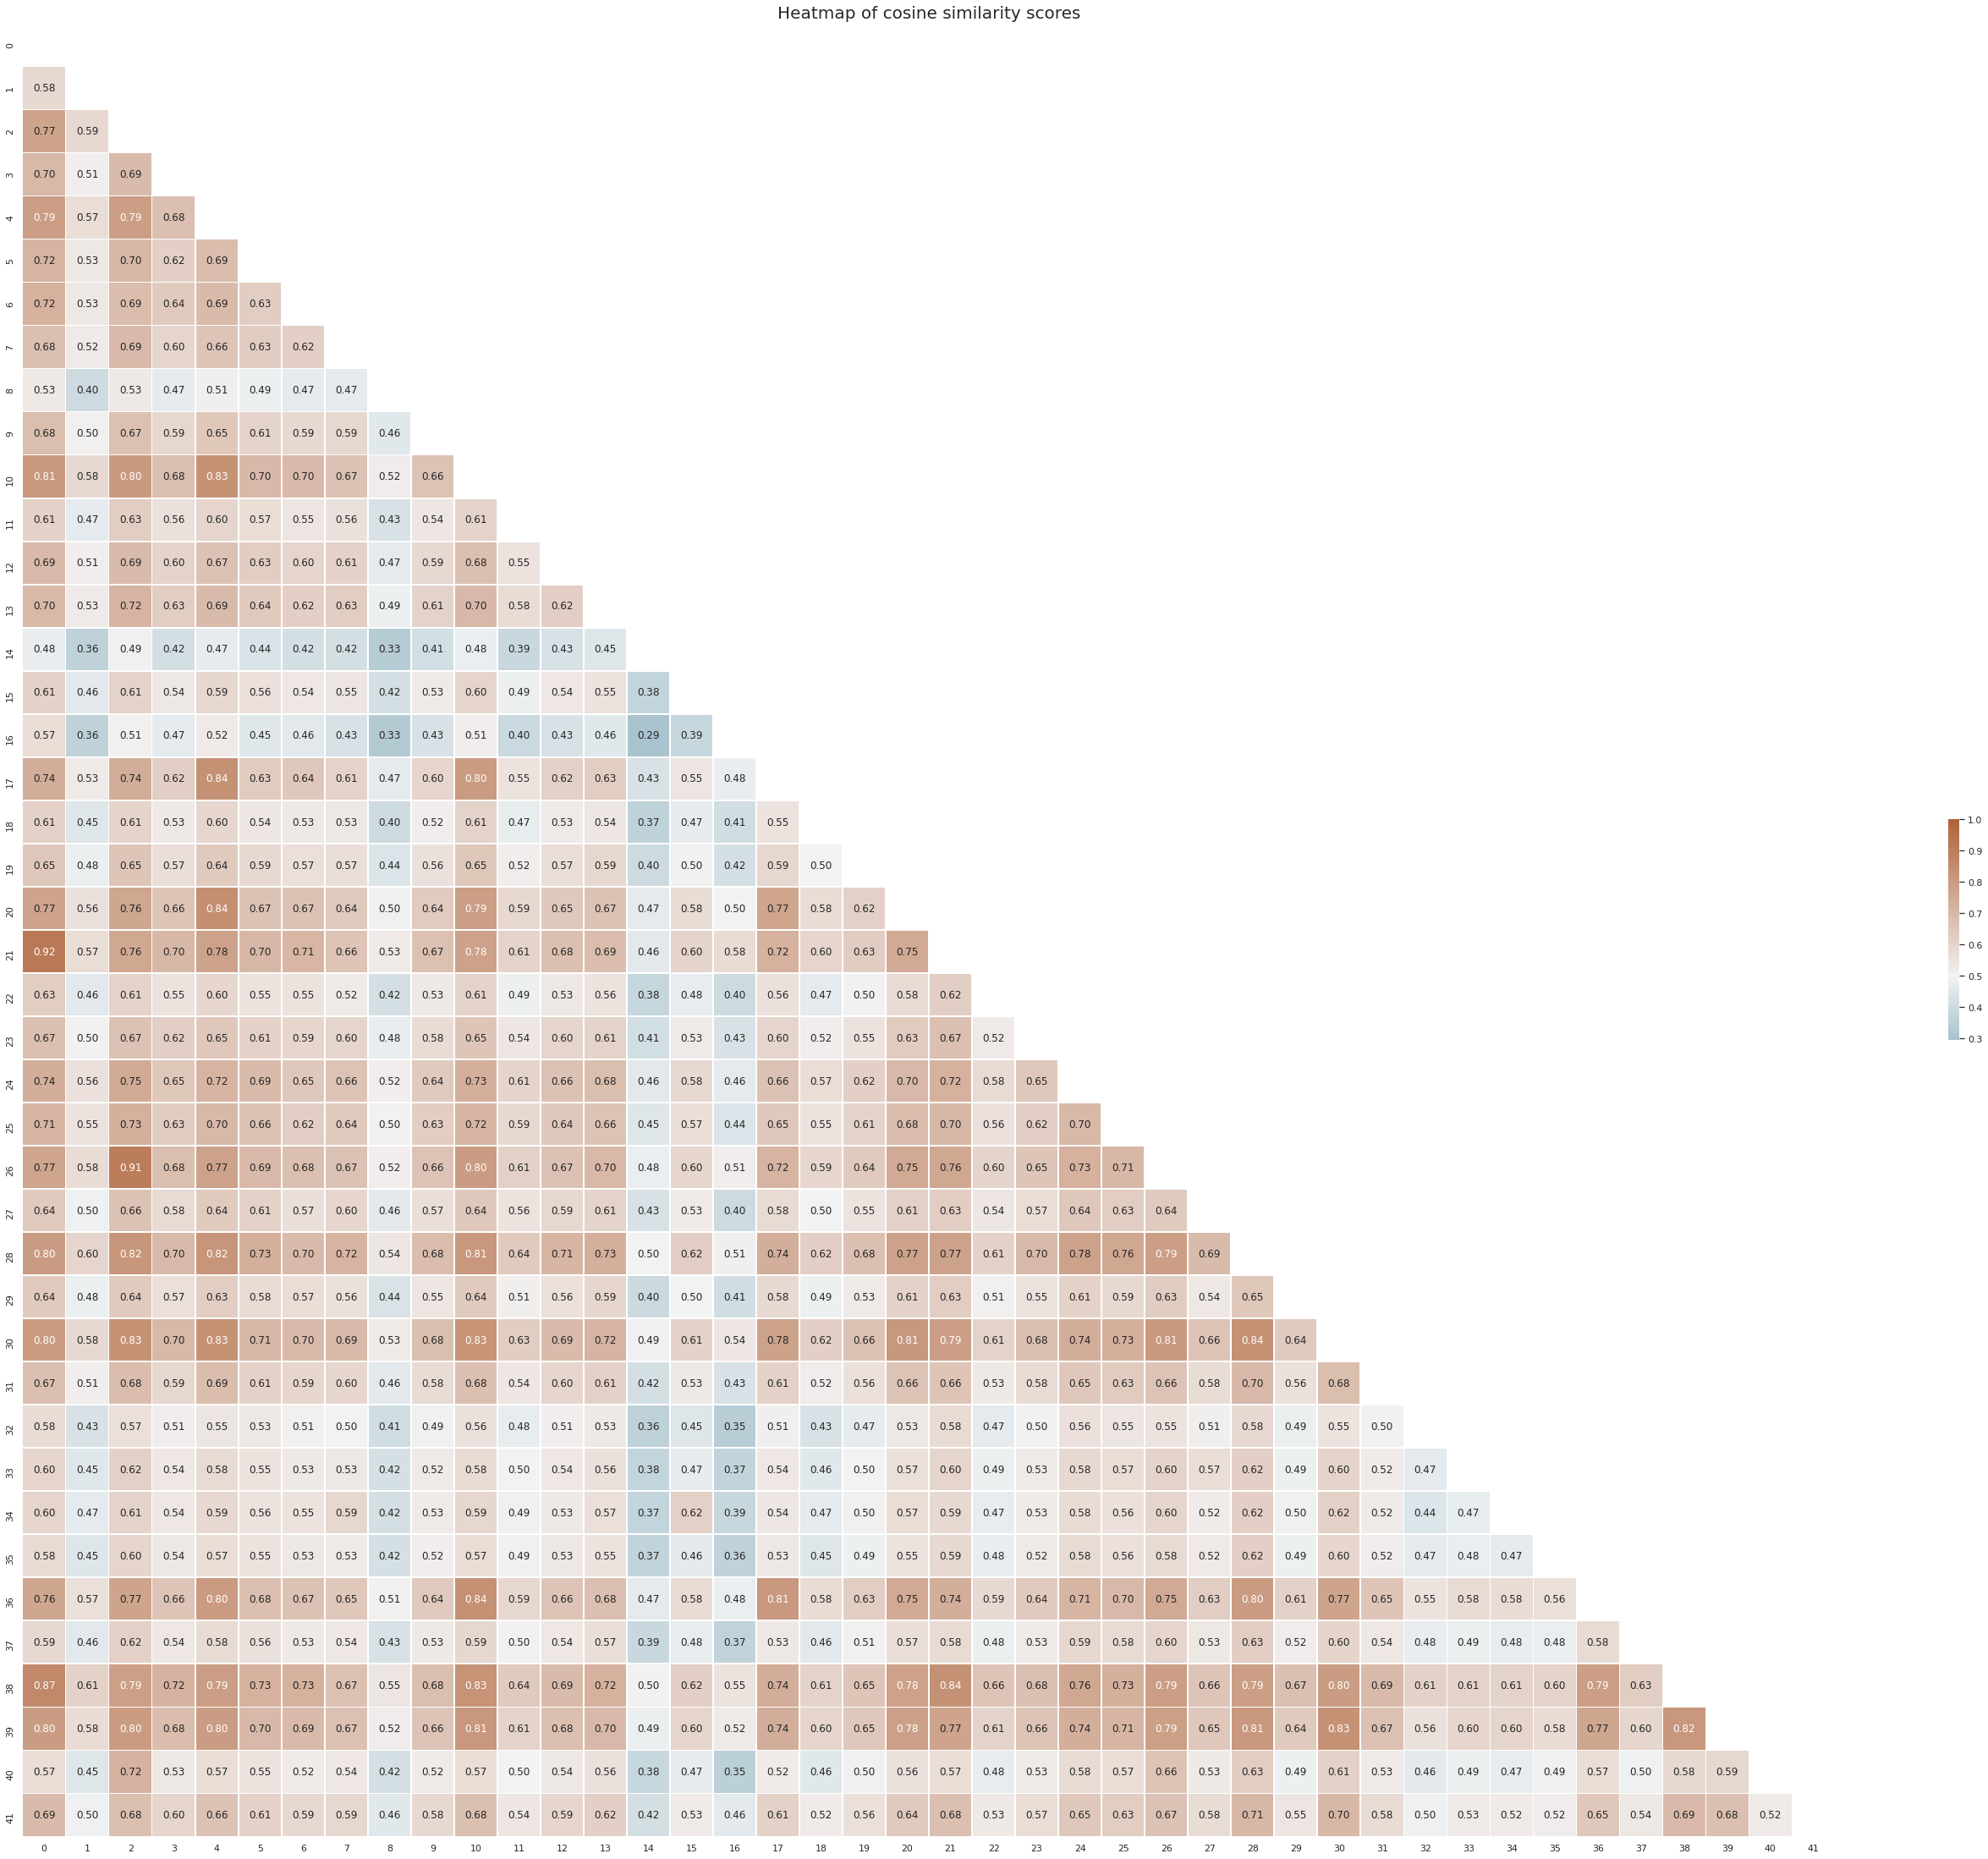

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plot_heatmap(cosine_sim,df.index,df.index)

b) Use Doc2Vec to create document embeddings and find the similarities between the
documents. To visualize this, also create a 42 x 42 heatmap for this.


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

data_tagged = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(data)]
D2V_model = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
D2V_model.build_vocab(data_tagged)

D2V_model.train(data_tagged,
                total_examples=D2V_model.corpus_count,
                epochs=D2V_model.epochs)
    
doc_emb=np.zeros((len(data),100))

for i in range(len(doc_emb)):
    doc_emb[i]=D2V_model.docvecs[i]
    
    
cos_similarities=cosine_similarity(doc_emb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


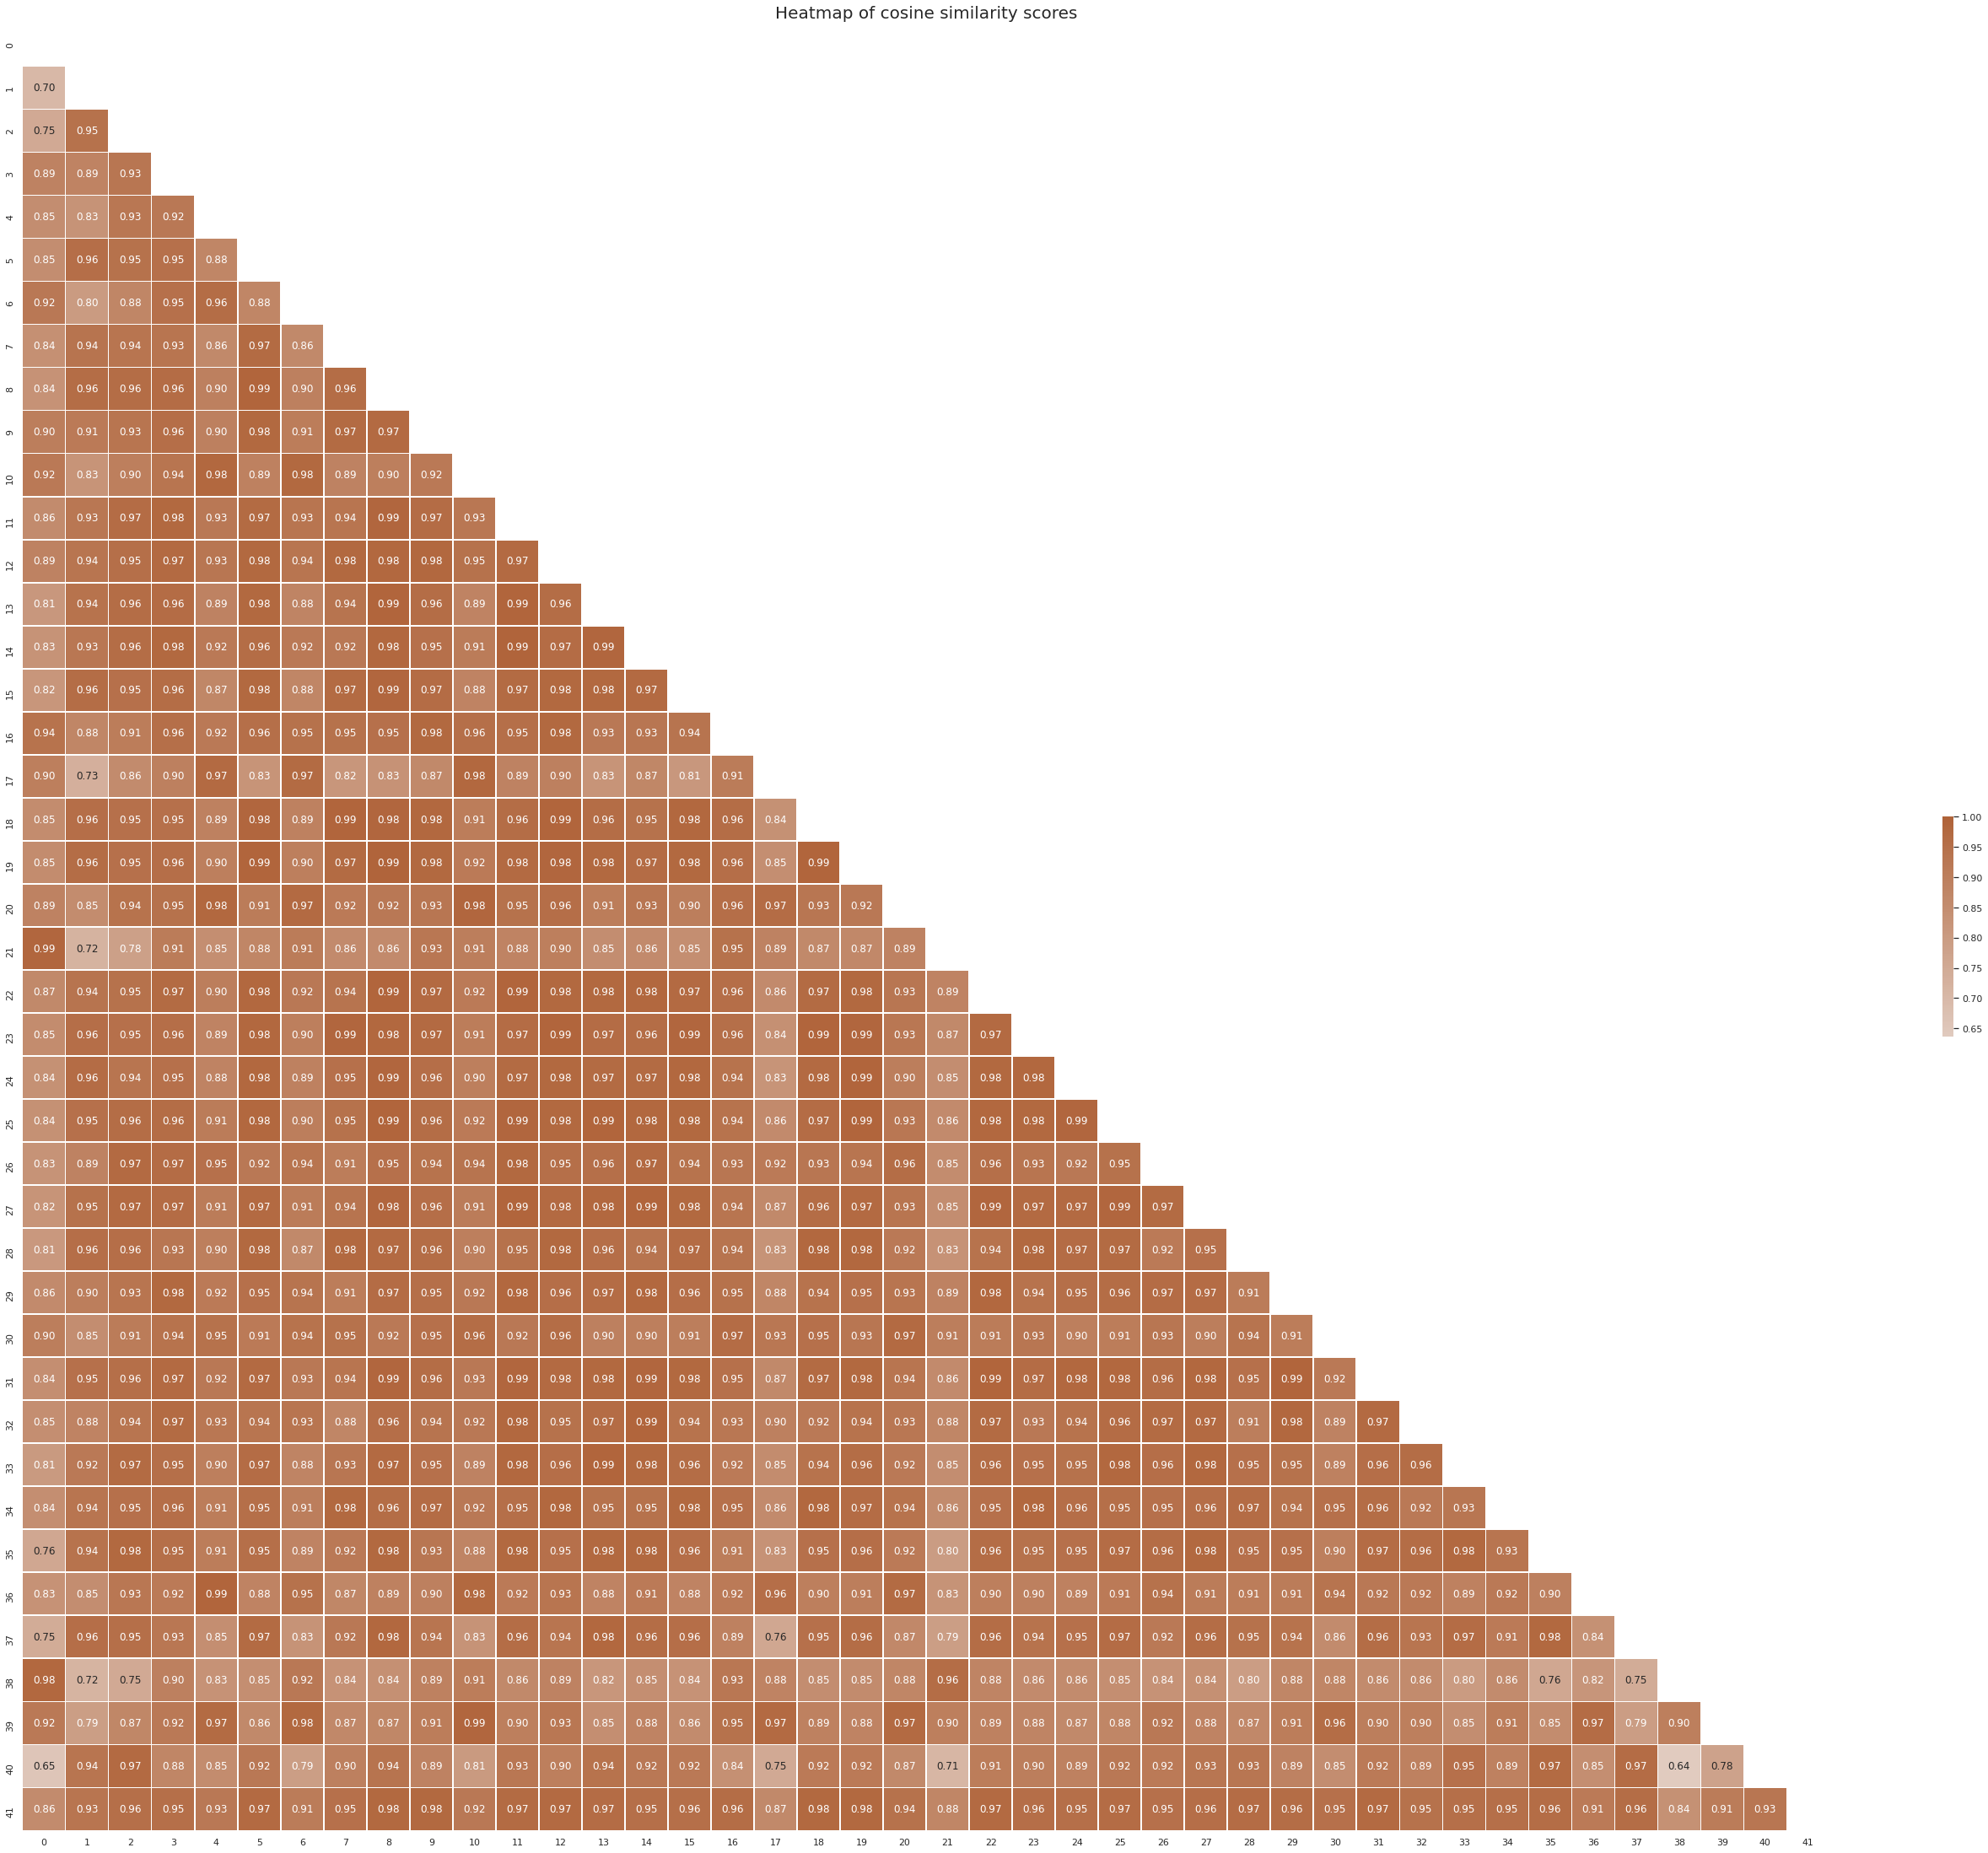

In [ ]:
plot_heatmap(cos_similarities,df.index,df.index)

c) What are the differences you find between the two methods? Is there anything radically
different? Please describe your answer in terms of the heatmap of part a and part b.


The TF-IDF is a one-to-one term mapping that calculates the likelihood of a given term occurring in a document.

Doc2Vec is a covariant probability mapping from mamy to many terms. Words in any document derive context from their neighbors. As a result, in order to provide additional context, we supplement our data set with publicly available data sets that are subsets of textual data.

Thus, in the case of Doc2Vec, more data is required, whereas TFIDF works well for small data sets.

In this scenario, we can see from the heat maps that TFIDF has fewer chances of finding a term than Doc2Vec because it doesn't have as many to many term mappings, so Doc2Vec has a higher confidence level which reflects in the map

https://towardsdatascience.com/nlp-embedding-techniques-51b7e6ec9f92

Question 3) (30 points) Using the Homework 2 dataset. Use SpaCy to extract the following:
a) Write a function to generate all unique bigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of bigrams and their frequency. Display the top 10 most common bigrams and their
frequency.

In [ ]:
concatenated_data = ''
for ele in data:
  concatenated_data = concatenated_data + ele

In [ ]:
import spacy
import nltk
from nltk import bigrams

def bigrams_top_10(concatenated_data):
  # load English model
  Spacy_eng = spacy.load('en')
  nltk_tokens = nltk.word_tokenize(concatenated_data)  	
  b_list = list(nltk.bigrams(nltk_tokens))
  fdist = nltk.FreqDist(b_list)
  list_dum = sorted(fdist.items(), key=lambda item: item[1],reverse = True)
  top_10 = list_dum[0:10]
  return top_10

In [ ]:
bigrams_top_10(concatenated_data)

[((',', 'and'), 7555),
 (('.', ']'), 6766),
 (('.', '['), 4857),
 ((',', 'I'), 4460),
 ((',', 'And'), 3742),
 (('.', 'I'), 3132),
 ((',', '['), 2773),
 ((',', 'my'), 2251),
 (('[', 'Enter'), 2177),
 (('I', 'am'), 1962)]

b) Write a function to generate all unique trigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of trigrams and their frequency. Display the top 10 most common trigrams and their
frequency.


In [ ]:
from nltk import trigrams

def trigrams_top_10(concatenated_data):
  # load English model
  Spacy_eng = spacy.load('en')
  nltk_tokens = nltk.word_tokenize(concatenated_data)  	
  t_list = list(nltk.trigrams(nltk_tokens))
  tdist = nltk.FreqDist(t_list)
  list_dum = sorted(tdist.items(), key=lambda item: item[1],reverse = True)
  top_10 = list_dum[0:10]
  return top_10

In [ ]:
trigrams_top_10(concatenated_data)

[(('.', '[', 'Enter'), 994),
 ((',', 'sir', ','), 991),
 (('exits', '.', ']'), 986),
 (('exit', '.', ']'), 970),
 ((',', 'my', 'lord'), 957),
 (('.', '[', 'He'), 918),
 ((',', '[', 'to'), 876),
 ((',', '[', 'as'), 717),
 (('.', '[', 'They'), 698),
 (('=======', '[', 'Enter'), 630)]

c) Write a function to extract all unique NOUN and VERB tokens. The input of this function
should be the concatenated dataset and the output should be two lists: one of the NOUN
tokens and their frequency, the other list should be the VERB tokens and their counts.
Display the top 10 most common NOUN and VERB tokens.


In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
def nouns_and_verbs(concatenated_data):
  tokens = nltk.tokenize.word_tokenize(concatenated_data)
  tagged_tokens = pos_tag(tokens)
  nouns = [token[0] for token in tagged_tokens if token[1] in ['NN']]
  verbs = [token[0] for token in tagged_tokens if token[1] in ['VBP','VB','VBD','VBG','VBN','VBZ']]
  noun_frequency = nltk.FreqDist(nouns)
  verb_frequency = nltk.FreqDist(verbs)
  list_noun_top10 = sorted(noun_frequency.items(), key=lambda item: item[1],reverse = True)[0:10]
  list_verb_top10 = sorted(verb_frequency.items(), key=lambda item: item[1],reverse = True)[0:10]
  return list_noun_top10,list_verb_top10

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
list_noun_top10,list_verb_top10 = nouns_and_verbs(concatenated_data)

In [ ]:
list_noun_top10

[('thou', 2158),
 ('lord', 2128),
 ('man', 2026),
 (']', 1967),
 ('thee', 1917),
 ('love', 1397),
 ('sir', 1393),
 ('[', 1336),
 ('heart', 1089),
 ('time', 1080)]

In [ ]:
list_verb_top10

[('is', 10200),
 ('be', 6755),
 ('have', 5768),
 ('do', 3457),
 ('are', 3328),
 (']', 2476),
 ('was', 2340),
 ('am', 2229),
 ("'s", 1981),
 ('know', 1671)]

d) What do you think the most common bigrams and trigrams could be useful for? There is
a particular method we have seen in this class to characterize a corpus that could benefit
from having these bigrams/trigrams when the underlying text corpus can’t be shared.
Please talk about this.


Text N-grams are widely used in text mining and natural language processing tasks. They are essentially a collection of co-occurring words within a given window, and when computing the n-grams, you typically advance one word.
N-grams are used for a variety of tasks. For example, when creating a language model. Google and Microsoft have created web scale n-gram models that can be used for a variety of tasks such as spelling correction, word breaking, and text summarization. This also improves confidentiality and data leakage

Question 4) (30 points) Using the dataset: Ask0729, found in Exam files, write two functions to
extract all dates found in this dataset. The input of these functions should take the dataset as
input, and output a list of dates. You should use two different methods, one per function.

In [ ]:
!unzip '/content/Ask0729.zip'

Archive:  /content/Ask0729.zip
  inflating: Ask0729-fixed.txt       


a) First method: using SpaCy (this is a big enough hint

In [ ]:
import spacy
import nltk

file1 = open("/content/Ask0729-fixed.txt","r+") 
nlp = spacy.load("en_core_web_sm")
doc = nlp(file1.read())


In [ ]:
def Spacy_dates_extraction(doc):
  new = []
  for ent in filter(lambda e: e.label_=='DATE',doc.ents):
    new.append(ent.text)
  return new


b) Second method: using regular expressions.

In [ ]:
import re

def reg_date(doc):
  new = []
  dt_1 =re.findall('(\d{1,2}[-/]\d{1,2}[/-]\d{2,4})',doc)
  for e in dt_1:
    new.append(e)
  dt_2 =re.findall('(\d{1,2}/\d{4})',doc)
  for e in dt_2:
    new.append(e)
  dt_3 =re.findall('((?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*[ -.]*\d{2}[thsdn, .-]*\d{4})',doc)
  for e in dt_3:
    new.append(e)
  dt_4 =re.findall('((?:\d{1,2} )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*[,. ]*\d{4})',doc)
  for e in dt_4:
    new.append(e)
  return new

c) Print to screen to compare the results from the two functions.


In [ ]:
Spacy_dates_extraction(doc)

['up to 5 years',
 'today',
 'today',
 'today',
 'one week',
 'MA 02143',
 'daily',
 'today',
 '3+ Nights & Save',
 'this week',
 'weekend',
 'this week',
 '2 Weeks',
 'the year',
 'tomorrow',
 'Wednesday',
 'Saturday',
 'the 6 year old',
 'tomorrow',
 '25 years',
 'year end 2000',
 'under 40/over 40',
 'junior-year',
 'all summer',
 'next week',
 'yesterday',
 'Monday',
 'Thursday 4:00PM',
 'July 31, 2014',
 '30 June 2012',
 'April 15th',
 'this year',
 'this time',
 'next year',
 'years',
 'Friday',
 'Monday',
 'December 7th',
 'yesterday',
 'yesterday',
 'tomorrow',
 '14 day',
 '2 days',
 'years',
 'tomorrow',
 'tomorrow',
 'tomorrow',
 'the next year',
 'Sunday',
 'a day',
 '12 MONTHS',
 'July 4, 2012',
 'Tomorrow',
 'this week',
 'Tuesday, March 20, 2001',
 'annual',
 '21st Century',
 'this week',
 'tomorrow',
 'next Wednesday',
 'the old days',
 'Next week',
 'April',
 'the 19th',
 'August 31st',
 'the year',
 'only a week',
 'June 23, 2000',
 'today',
 'Last week',
 'Friday',
 '

In [ ]:
file1 = open("/content/Ask0729-fixed.txt","r+") 
doc_rg = file1.read()

reg_date(doc_rg)

['12/18/11',
 '12/18/11',
 '12/18/11',
 '12/18/11',
 '02/28/12',
 '02/28/12',
 '02/28/12',
 '02/28/12',
 '12/17/11',
 '12/17/11',
 '12/17/11',
 '03/28/2011',
 '06/26/14',
 '05/28/2011',
 '14-07-01',
 '06-30-14',
 '1/26/00',
 '7/24/00',
 '1/2000',
 '28/2011',
 '28/2011',
 'July 31, 2014',
 'March 20, 2001',
 'June 23, 2000',
 'February 28, 2014',
 'August 22, 2012',
 'August 23, 2012',
 'July 31, 2013',
 'January 14, 2013',
 'June 14, 2001',
 'January 16, 2013',
 'January 18, 2013',
 'Feb. 20, 2001',
 'Feb 26, 2013',
 'October 26, 2001',
 'January 29, 2001',
 'June 12, 2001',
 'January 19, 2002',
 'August 21, 2001',
 'December 16th, 2013',
 'October 17, 2013',
 'January 25, 2001',
 'January 31, 2013',
 'February 20, 2001',
 'August 27th, 2013',
 'May 12, 2001',
 '30 June 2012',
 'April 2011',
 'August 2013',
 'May, 1000',
 'June 2011',
 'March 2011',
 '28 August 2011',
 'April 2010',
 '1 Dec 2013',
 '29 April 2012',
 'Jan 2000',
 'Dec 2000',
 'January 2001']

d) Which one of the two approaches was better? Why do you think so? Would you use any
of these approaches? Or a different one?

In our attempt to find dates using regular expressions, the challenge is to devise a pattern that captures all of the different ways a date can be written. A second challenge is identifying numbers or expressions where we can be reasonably certain that the number represents a date and not something else.
Designing regular expressions to capture a wide range of sentences that represent an event would take a significant amount of time and effort. To save time and effort, we can employ a Natural Language Processing technique known as Named Entity Recognition (NER). Named Entity Recognition is the process of annotating phrases in a text that are not "regular" words but instead refer to a specific entity in the real world. In this activity, we use spaCy, a library for performing various types of NLP tasks, including named entity recognition. Load spaCy and run NER on the preceding sentence. We print out all discovered named entities along with their label, which indicates the type of named entity  and we don't miss out on capturing any date related intances in the text.

Question 5) (30 points) Train an LSTM model to classify the Cornell Movie Review data
using the polarity_dataset V2.0. You can use the code for class 19, but take a note that
you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use
85% of the dataset for training, and 15% for testing. Once you build the model, please display
the sklearn classification report. What are you noticing here? Anything unexpected? How does
this model compare to the one built with the IMDB dataset in class? Any ideas on how to
improve it?


In [ ]:
!tar -xvf "/content/review_polarity.tar.gz"

In [ ]:
import os

data_dir = "/content/txt_sentoken"
files = os.listdir(data_dir+"/")
files

['pos', 'neg']

In [ ]:
def List_Of_Files(dir_Name): 
    listOfFile = [x for x in os.walk(dir_Name)]
    return listOfFile  

In [ ]:
count = 0
for file_train in files:
  if count != 1 :
    data_train_positive = List_Of_Files(data_dir+ "/" + file_train+"/")
    count += 1
  else:
    print(file_train)
    data_train_negative =  List_Of_Files(data_dir+ "/" + file_train+"/")

neg


In [ ]:
data_training_negative = []
for d_t_n in data_train_negative[0][2]:
  with open(data_train_negative[0][0]+"/"+d_t_n,'r') as fs:
    data_training_negative.append(fs.read())

data_training_positive = []
for d_t_p in data_train_positive[0][2]:
  with open(data_train_positive[0][0]+"/"+d_t_p,'r') as fs:
    data_training_positive.append(fs.read())

In [ ]:
import pandas as pd

positive_df = pd.DataFrame(data_training_positive,columns = ['Data'])
positive_df['Label'] = "Positive"
negative_df = pd.DataFrame(data_training_negative,columns = ['Data'])
negative_df['Label'] = "Negative"
data_df = pd.DataFrame()
data_df = pd.concat([positive_df,negative_df])

In [ ]:
data_df.head(10)

Data     Label
0  like the great musical pieces of mozart himsel...  Positive
1  it's a curious thing - i've found that when wi...  Positive
2  note : some may consider portions of the follo...  Positive
3  until i saw the night of the hunter , it had b...  Positive
4  capsule : suprisingly more of a comedy than a ...  Positive
5  the premise is simple , if not bizarre . \na m...  Positive
6  at one point during brian de palma's crime epi...  Positive
7  a lot of times a three-star film will be my fa...  Positive
8  the truman show ( paramount pictures ) running...  Positive
9  truman ( " true-man " ) burbank is the perfect...  Positive

In [ ]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train, y_test= train_test_split(data_df.Data,data_df.Label, test_size=0.15, random_state=12345)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_df.Data)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43297


In [ ]:
lab_to_sentiment = {"Negative":0, "Positive":1}
def decode_label(label):
 return lab_to_sentiment[label]

y_train = y_train.apply(lambda x: decode_label(x))
y_test = y_test.apply(lambda x: decode_label(x))



In [ ]:
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 450
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1700, 450)
Testing X Shape: (300, 450)


In [ ]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

model = tf.keras.models.Sequential()


model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = MAX_SEQUENCE_LENGTH # Length of input sequences
    )
)


model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)


model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 450, 32)           1385504   
_________________________________________________________________
dropout_8 (Dropout)          (None, 450, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,393,857
Trainable params: 1,393,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train , batch_size=256, epochs=5,validation_split=0.2, verbose=1)

Epoch 1/5
6/6 [==============================] - 5s 597ms/step - loss: 0.6931 - accuracy: 0.4977 - val_loss: 0.6927 - val_accuracy: 0.5088
Epoch 2/5
6/6 [==============================] - 3s 482ms/step - loss: 0.6906 - accuracy: 0.6085 - val_loss: 0.6916 - val_accuracy: 0.5559
Epoch 3/5
6/6 [==============================] - 3s 469ms/step - loss: 0.6860 - accuracy: 0.6854 - val_loss: 0.6893 - val_accuracy: 0.5441
Epoch 4/5
6/6 [==============================] - 3s 480ms/step - loss: 0.6774 - accuracy: 0.7095 - val_loss: 0.6830 - val_accuracy: 0.6294
Epoch 5/5
6/6 [==============================] - 3s 483ms/step - loss: 0.6554 - accuracy: 0.7969 - val_loss: 0.6357 - val_accuracy: 0.5824


In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=['0','1']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.49      0.98      0.65       136
           1       0.88      0.14      0.24       164

    accuracy                           0.52       300
   macro avg       0.69      0.56      0.45       300
weighted avg       0.70      0.52      0.43       300



We can see that the loss decreased as the epochs progressed, and the accuracy acheived is near to the val_accuracy which means that our model is good. but then to improve the results more data would be necessary.

Question 6) (30 points) Use the train.txt file from the PubMed 20K RCT dataset fine-tune a
BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the
source dataset has FIVE different classes: background, objective, method, result, and
conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. Please present the
per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the
global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the
baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve
it?

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [ ]:
import re 
f = open('/content/train.txt',"r+") 

text = re.sub("\n","\t",f.read())
text_1 = re.sub("###\d+\t",'',text)
text_2 = re.sub(' .\t','\n',text_1)

f = open('/content/train.txt',"w+") 
f.write(text_2)

import pandas as pd
df = pd.read_csv('/content/train.txt',sep='\t',names = ['classes','text'],lineterminator='\n',header=None)

df.dropna(inplace= True)

In [ ]:
df['classes'].unique()

array(['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],
      dtype=object)

In [ ]:
lab_to_sentiment = {'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4, 'BACKGROUND':0}
def decode_label(label):
 return lab_to_sentiment[label]

df['classes'] = df['classes'].apply(lambda x: decode_label(x))



In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.text.values
labels = df.classes.values

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA )
Tokenized:  ['to', 'investigate', 'the', 'efficacy', 'of', '6', 'weeks', 'of', 'daily', 'low', '-', 'dose', 'oral', 'pre', '##d', '##nis', '##olo', '##ne', 'in', 'improving', 'pain', ',', 'mobility', ',', 'and', 'systemic', 'low', '-', 'grade', 'inflammation', 'in', 'the', 'short', 'term', 'and', 'whether', 'the', 'effect', 'would', 'be', 'sustained', 'at', '12', 'weeks', 'in', 'older', 'adults', 'with', 'moderate', 'to', 'severe', 'knee', 'os', '##te', '##oa', '##rth', '##rit', '##is', '(', 'o', '##a', ')']
Token IDs:  [2000, 8556, 1996, 21150, 1997, 1020, 3134, 1997, 3679, 2659, 1011, 13004, 8700, 3653, 2094, 8977, 12898, 2638, 1999, 9229, 3255, 1010, 12969, 1010, 1998, 22575, 2659, 1011, 3694, 2

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  572


In [ ]:
import torch

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA )
Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,   102])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

148,040 training samples
16,449 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [ ]:
import re 
f = open('/content/train.txt',"r+") 

text = re.sub("\n","\t",f.read())
text_1 = re.sub("###\d+\t",'',text)
text_2 = re.sub(' .\t','\n',text_1)

f = open('/content/train.txt',"w+") 
f.write(text_2)

import pandas as pd
df = pd.read_csv('/content/train.txt',sep='\t',names = ['classes','text'],lineterminator='\n',header=None)

df.dropna(inplace= True)

In [ ]:
df['classes'].unique()

array(['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],
      dtype=object)

In [ ]:
lab_to_sentiment = {'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4, 'BACKGROUND':0}
def decode_label(label):
 return lab_to_sentiment[label]

df['classes'] = df['classes'].apply(lambda x: decode_label(x))



In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.text.values
labels = df.classes.values

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA )
Tokenized:  ['to', 'investigate', 'the', 'efficacy', 'of', '6', 'weeks', 'of', 'daily', 'low', '-', 'dose', 'oral', 'pre', '##d', '##nis', '##olo', '##ne', 'in', 'improving', 'pain', ',', 'mobility', ',', 'and', 'systemic', 'low', '-', 'grade', 'inflammation', 'in', 'the', 'short', 'term', 'and', 'whether', 'the', 'effect', 'would', 'be', 'sustained', 'at', '12', 'weeks', 'in', 'older', 'adults', 'with', 'moderate', 'to', 'severe', 'knee', 'os', '##te', '##oa', '##rth', '##rit', '##is', '(', 'o', '##a', ')']
Token IDs:  [2000, 8556, 1996, 21150, 1997, 1020, 3134, 1997, 3679, 2659, 1011, 13004, 8700, 3653, 2094, 8977, 12898, 2638, 1999, 9229, 3255, 1010, 12969, 1010, 1998, 22575, 2659, 1011, 3694, 2

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  572


In [ ]:
import torch

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA )
Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,   102])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

148,040 training samples
16,449 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  4,627.    Elapsed: 0:00:08.
  Batch    80  of  4,627.    Elapsed: 0:00:16.
  Batch   120  of  4,627.    Elapsed: 0:00:24.
  Batch   160  of  4,627.    Elapsed: 0:00:32.
  Batch   200  of  4,627.    Elapsed: 0:00:40.
  Batch   240  of  4,627.    Elapsed: 0:00:48.
  Batch   280  of  4,627.    Elapsed: 0:00:56.
  Batch   320  of  4,627.    Elapsed: 0:01:04.
  Batch   360  of  4,627.    Elapsed: 0:01:12.
  Batch   400  of  4,627.    Elapsed: 0:01:20.
  Batch   440  of  4,627.    Elapsed: 0:01:28.
  Batch   480  of  4,627.    Elapsed: 0:01:36.
  Batch   520  of  4,627.    Elapsed: 0:01:45.
  Batch   560  of  4,627.    Elapsed: 0:01:53.
  Batch   600  of  4,627.    Elapsed: 0:02:01.
  Batch   640  of  4,627.    Elapsed: 0:02:09.
  Batch   680  of  4,627.    Elapsed: 0:02:18.
  Batch   720  of  4,627.    Elapsed: 0:02:26.
  Batch   760  of  4,627.    Elapsed: 0:02:34.
  Batch   800  of  4,627.    Elapsed: 0:02:43.
  Batch   840  of

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.41         0.35           0.87       0:16:20         0:00:34
2               0.30         0.35           0.88       0:16:22         0:00:33
3               0.24         0.37           0.88       0:16:21         0:00:33

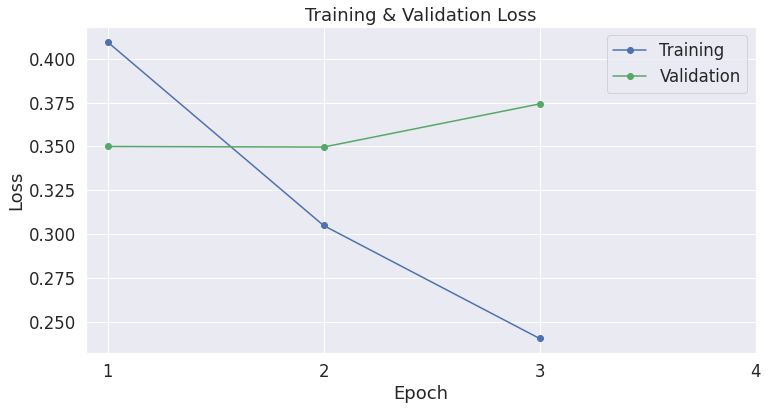

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import re 
f = open('/content/test.txt',"r+") 

text = re.sub("\n","\t",f.read())
text_1 = re.sub("###\d+\t",'',text)
text_2 = re.sub(' .\t','\n',text_1)

f = open('/content/test.txt',"w+") 
f.write(text_2)

import pandas as pd
df = pd.read_csv('/content/test.txt',sep='\t',names = ['classes','text'],lineterminator='\n',header=None)

df.dropna(inplace= True)

In [ ]:
lab_to_sentiment = {'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4, 'BACKGROUND':0}
def decode_label(label):
 return lab_to_sentiment[label]

df['classes'] = df['classes'].apply(lambda x: decode_label(x))



In [ ]:

# Create sentence and label lists
sentences = df.text.values
labels = df.classes.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 27,552 test sentences...
    DONE.


In [ ]:
predictions

[array([[ 2.8079126e+00,  3.0786726e+00, -7.1016151e-01, -2.0507627e+00,
         -3.2426310e+00],
        [-9.4090444e-01, -9.2220640e-01,  4.1003323e+00,  1.2535059e+00,
         -4.1469798e+00],
        [-1.7405266e+00, -2.0275710e+00,  5.2234573e+00,  1.4762104e+00,
         -3.5013325e+00],
        [-2.8601098e+00, -2.6708941e+00,  3.8605242e+00,  3.3203201e+00,
         -2.3119674e+00],
        [-2.7630141e+00, -3.5670190e+00, -1.6175178e+00,  5.4648418e+00,
          2.0148730e+00],
        [-2.2289438e+00, -2.5294440e+00, -9.7825372e-01,  6.1481886e+00,
         -8.6488938e-01],
        [-2.8015022e+00, -3.3521843e+00, -3.9573753e-01,  6.4422517e+00,
         -7.0723557e-01],
        [ 1.0592872e+00,  1.2602884e-01, -3.4688265e+00, -2.1539495e+00,
          4.8986468e+00],
        [ 2.7693175e-03, -6.0114759e-01, -3.4788260e+00, -1.3259453e+00,
          5.7464528e+00],
        [ 3.5358806e+00,  3.0978498e+00, -7.1381736e-01, -2.9989777e+00,
         -3.0898535e+00],
        [-

Bonus Question: (50 points) Solve question 6 but instead for fine-tuning BERT, use: BioBert
(20 points) and BlueBERT (20 points) and compare the results of the three approaches in a
nice table. Answer the following questions: Did you model beat the baseline results
(https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?

BioBERT

In [ ]:
!pip install pytorch_transformers
!pip install transformers

     |████████████████████████████████| 184kB 15.0MB/s 
     |████████████████████████████████| 1.2MB 39.5MB/s 
     |████████████████████████████████| 870kB 52.0MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 7.4MB 48.8MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=4ac2b8ca8855e3865841402803a22c424a65b3c163f3e954f67d336c994aa3cc
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
  Created wheel for boto3: filename=boto3-1.17.50-py2.py3-none-any.whl size=128779 sha256=4b71a720a34cbb7b70916337cdbb6e432703c43dfde4f02a8669bf26f2b2b72d
  Stored in directory: /root/.cache/pip/wheels/28/e5/43/ef6fc36c3008477a35f9324c0e490c7aa20f7b51993a388267
Successfully built sacremoses boto3
ERROR: botocore 1.20.50 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD" -O biobert_weights && rm -rf /tmp/cookies.txt


--2021-04-13 07:48:48--  https://docs.google.com/uc?export=download&confirm=8bhL&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD
Resolving docs.google.com (docs.google.com)... 172.217.9.206, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-9g-docs.googleusercontent.com/docs/securesc/odf2h2laqbijts0aptihlpr4dlath0gr/dna0svdu669l78tot2ag1u04h7drjklj/1618300125000/13799006341648886493/03337325864022981096Z/1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD?e=download [following]
--2021-04-13 07:48:48--  https://doc-0c-9g-docs.googleusercontent.com/docs/securesc/odf2h2laqbijts0aptihlpr4dlath0gr/dna0svdu669l78tot2ag1u04h7drjklj/1618300125000/13799006341648886493/03337325864022981096Z/1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD?e=download
Resolving doc-0c-9g-docs.googleusercontent.com (doc-0c-9g-docs.googleusercontent.com)... 172.217.15.65, 2607:f8b0:4004:810::2001
Connecting to doc-0c-9

In [ ]:
!tar -xzf biobert_weights
!ls biobert_v1.1_pubmed/

bert_config.json			model.ckpt-1000000.index  vocab.txt
model.ckpt-1000000.data-00000-of-00001	model.ckpt-1000000.meta


In [ ]:
!transformers-cli convert --model_type bert --tf_checkpoint biobert_v1.1_pubmed/model.ckpt-1000000 --config biobert_v1.1_pubmed/bert_config.json --pytorch_dump_output biobert_v1.1_pubmed/pytorch_model.bin


2021-04-13 07:49:40.923476: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Building PyTorch model from configuration: BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.5.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

Converting TensorFlow checkpoint from /content/biobert_v1.1_pubmed/model.ckpt-1000000
Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
Loading TF weight bert/embeddings/LayerNorm/gamma with shape [768]
Loading TF weight bert/embeddings/position_embeddings with shap

In [ ]:
!ls biobert_v1.1_pubmed/
!mv biobert_v1.1_pubmed/bert_config.json biobert_v1.1_pubmed/config.json
!ls biobert_v1.1_pubmed/

bert_config.json			model.ckpt-1000000.meta
model.ckpt-1000000.data-00000-of-00001	pytorch_model.bin
model.ckpt-1000000.index		vocab.txt
config.json				model.ckpt-1000000.meta
model.ckpt-1000000.data-00000-of-00001	pytorch_model.bin
model.ckpt-1000000.index		vocab.txt


In [ ]:
from pytorch_transformers import BertModel
model = BertModel.from_pretrained('biobert_v1.1_pubmed')

In [ ]:
import re 
f = open('/content/train.txt',"r+") 

text = re.sub("\n","\t",f.read())
text_1 = re.sub("###\d+\t",'',text)
text_2 = re.sub(' .\t','\n',text_1)

f = open('/content/train.txt',"w+") 
f.write(text_2)

import pandas as pd
df = pd.read_csv('/content/train.txt',sep='\t',names = ['classes','text'],lineterminator='\n',header=None)

df.dropna(inplace= True)

In [ ]:
df['classes'].unique()

array(['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],
      dtype=object)

In [ ]:
lab_to_sentiment = {'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4, 'BACKGROUND':0}
def decode_label(label):
 return lab_to_sentiment[label]

df['classes'] = df['classes'].apply(lambda x: decode_label(x))



In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('biobert_v1.1_pubmed', do_lower_case=True)


Loading BERT tokenizer...


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.text.values
labels = df.classes.values

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  596


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.


In [ ]:
import torch

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA )
Token IDs: tensor([  101,  1106,  8242,  1103, 23891,  1104,   127,  2277,  1104,  3828,
         1822,   118, 13753,  9619,  3073, 22834,  1548, 12805,  1673,  1107,
         9248,  2489,   117, 16178,   117,  1105, 27410,  1822,   118,  3654,
        24970,  1107,  1103,  1603,  1858,  1105,  2480,  1103,  2629,  1156,
         1129,  8505,  1120,  1367,  2277,  1107,  2214,  6323,  1114,  8828,
         1106,  5199,  5656,   184, 13894, 19243,  1582,  7729,  1548,   113,
          184,  1161,   114,   102])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

148,040 training samples
16,449 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "biobert_v1.1_pubmed", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at biobert_v1.1_pubmed were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (28996, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  4,627.    Elapsed: 0:00:14.
  Batch    80  of  4,627.    Elapsed: 0:00:27.
  Batch   120  of  4,627.    Elapsed: 0:00:41.
  Batch   160  of  4,627.    Elapsed: 0:00:55.
  Batch   200  of  4,627.    Elapsed: 0:01:10.
  Batch   240  of  4,627.    Elapsed: 0:01:24.
  Batch   280  of  4,627.    Elapsed: 0:01:39.
  Batch   320  of  4,627.    Elapsed: 0:01:54.
  Batch   360  of  4,627.    Elapsed: 0:02:08.
  Batch   400  of  4,627.    Elapsed: 0:02:23.
  Batch   440  of  4,627.    Elapsed: 0:02:37.
  Batch   480  of  4,627.    Elapsed: 0:02:52.
  Batch   520  of  4,627.    Elapsed: 0:03:06.
  Batch   560  of  4,627.    Elapsed: 0:03:21.
  Batch   600  of  4,627.    Elapsed: 0:03:36.
  Batch   640  of  4,627.    Elapsed: 0:03:50.
  Batch   680  of  4,627.    Elapsed: 0:04:05.
  Batch   720  of  4,627.    Elapsed: 0:04:19.
  Batch   760  of  4,627.    Elapsed: 0:04:34.
  Batch   800  of  4,627.    Elapsed: 0:04:49.
  Batch   840  of

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.35         0.30           0.89       0:28:05         0:01:03
2               0.26         0.31           0.90       0:28:09         0:01:03
3               0.19         0.33           0.90       0:28:09         0:01:03

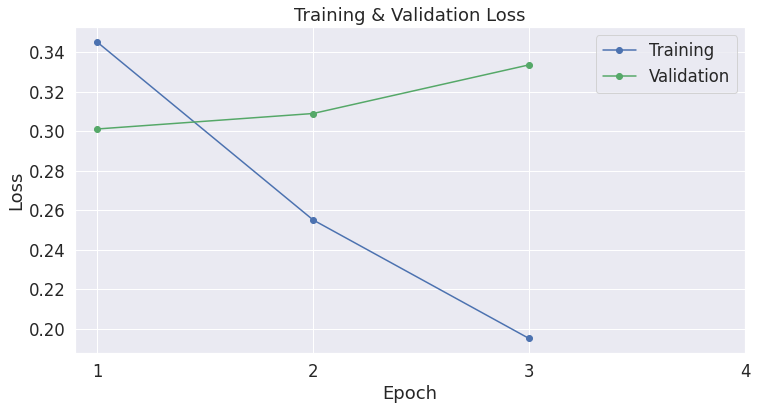

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import re 
f = open('/content/test.txt',"r+") 

text = re.sub("\n","\t",f.read())
text_1 = re.sub("###\d+\t",'',text)
text_2 = re.sub(' .\t','\n',text_1)

f = open('/content/test.txt',"w+") 
f.write(text_2)

import pandas as pd
df = pd.read_csv('/content/test.txt',sep='\t',names = ['classes','text'],lineterminator='\n',header=None)

df.dropna(inplace= True)

In [ ]:
lab_to_sentiment = {'OBJECTIVE':1, 'METHODS':2, 'RESULTS':3, 'CONCLUSIONS':4, 'BACKGROUND':0}
def decode_label(label):
 return lab_to_sentiment[label]

df['classes'] = df['classes'].apply(lambda x: decode_label(x))



In [ ]:

# Create sentence and label lists
sentences = df.text.values
labels = df.classes.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 164,489 test sentences...
    DONE.


BioBERT seems to be efficient when compared to BERT based on the values acheived for accuracy.